# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team
Chu Wang
Saranya Manoharan
Rishitha Kiran
Di You

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [2]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pylab as py
import matplotlib.pyplot as plt
import scipy
from IPython.display import HTML
from datetime import datetime
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
lastRunTime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
import re
%matplotlib inline

In [ ]:
#The data downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py

In [3]:
"""Script to download the movie review dataset"""

import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"


if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)

In [ ]:
#A completed solution found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py

n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.01
             precision    recall  f1-score   support

        neg       0.88      0.86      0.87       251
        pos       0.86      0.88      0.87       249

avg / total       0.87      0.87      0.87       500

[[216  35]
 [ 29 220]]


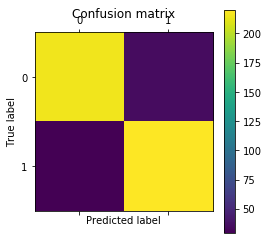

In [4]:
"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics


if __name__ == "__main__":
    # NOTE: we put the following in a 'if __name__ == "__main__"' protected
    # block to be able to use a multi-core grid search that also works under
    # Windows, see: http://docs.python.org/library/multiprocessing.html#windows
    # The multiprocessing module is used as the backend of joblib.Parallel
    # that is used when n_jobs != 1 in GridSearchCV

    # the training data folder must be passed as first argument
    #movie_reviews_data_folder = sys.argv[1]
    dataset = load_files(DATA_FOLDER, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    # TASK: Build a vectorizer / classifier pipeline that filters out tokens
    # that are too rare or too frequent
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # TASK: print the mean and std for each candidate along with the parameter
    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    y_predicted = grid_search.predict(docs_test)
    
 

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)

    import matplotlib.pyplot as plt
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [4]:
#max_df and n_gram_range were fixed, and a systematic screening of min_df value from 0 to 20 was performed. 
y =[]
for i in range(20):
    vect =TfidfVectorizer(decode_error='ignore',min_df=i, max_df=1.0, ngram_range = (1,1))
    X_train_tf = vect.fit_transform(docs_train)
    y.append(X_train_tf.shape[1])
print(y)


[35429, 35429, 21039, 16005, 13122, 11176, 9855, 8779, 7949, 7311, 6708, 6210, 5801, 5456, 5159, 4860, 4599, 4358, 4143, 3970]


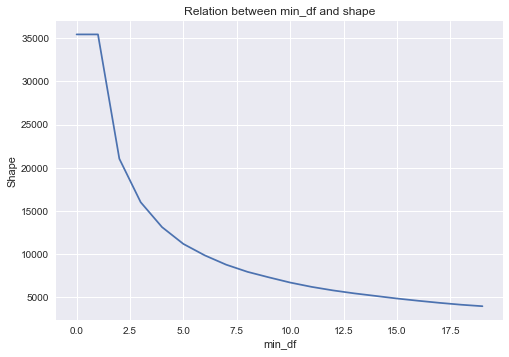

In [5]:
#The plotting result clearly indicates that the feature numbers decreased exponentially once the min_df increases.
plt.style.use('seaborn')
t = np.arange(len(y))
plt.plot(t, y)
plt.xlabel("min_df")
plt.ylabel("Shape")
  
plt.title("Relation between min_df and shape")
plt.show()

In [19]:
#min_df and n_gram_range were fixed, and a systematic screening of max_df value.
max_df_y =[]
l= np.arange(0.1,1.0,0.05)
#l = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0]

for i in l:
    vect =TfidfVectorizer(decode_error='ignore',min_df=1, max_df=i, ngram_range = (1,1))
    X_train_tf2 = vect.fit_transform(docs_train)
    max_df_y.append(X_train_tf2.shape[1])
print(max_df_y)


[34886, 35073, 35165, 35220, 35264, 35297, 35319, 35336, 35351, 35368, 35374, 35380, 35388, 35398, 35402, 35406, 35415, 35417]


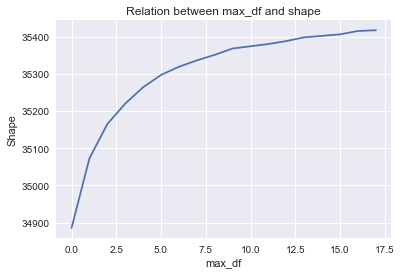

In [20]:
#The plotting result clearly indicates that the feature numbers increased exponentially once the max_df increases.
x_len = np.arange(len(max_df_y))
plt.plot(x_len,max_df_y)
plt.xlabel("max_df")
plt.ylabel("Shape")
  
plt.title("Relation between max_df and shape")
plt.show()

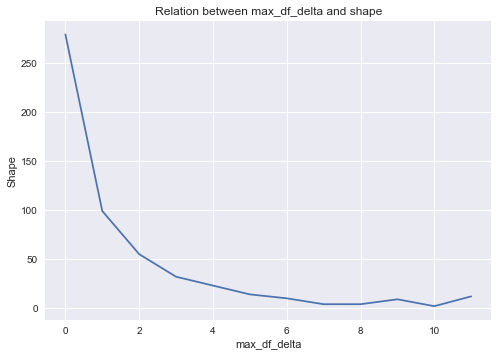

In [8]:
max_df_delta =[]
for i in range(len(max_df_y)-1):
    max_df_delta.append(max_df_y[i+1]-max_df_y[i])
    
x_len2 = np.arange(len(max_df_delta))

plt.plot(x_len2,max_df_delta)
plt.xlabel("max_df_delta")
plt.ylabel("Shape")
  
plt.title("Relation between max_df_delta and shape")
plt.show()

In [9]:
#A combination set of {(1,1), (2,2), (3,3), (4,4), (1,2), (2,3), (3,4), (1,3), (2,4), (1,4)} was searched one by one with fixed values of min_df and max_df.  
t=[(1,1),(2,2),(3,3),(4,4),(1,2),(2,3),(3,4),(1,3),(2,4),(1,4),(1,5)]
l_of_shape=[]
for i in t:
    vect =TfidfVectorizer(decode_error='ignore',min_df=1, max_df=1.0, ngram_range = i)
    X_train_tf = vect.fit_transform(docs_train)
    l_of_shape.append(X_train_tf.shape[1])
    print('ngram_range - %s; shape - %s;'
                 % (i, X_train_tf.shape[1]))

ngram_range - (1, 1); shape - 35429;
ngram_range - (2, 2); shape - 399785;
ngram_range - (3, 3); shape - 761536;
ngram_range - (4, 4); shape - 893589;
ngram_range - (1, 2); shape - 435214;
ngram_range - (2, 3); shape - 1161321;
ngram_range - (3, 4); shape - 1655125;
ngram_range - (1, 3); shape - 1196750;
ngram_range - (2, 4); shape - 2054910;
ngram_range - (1, 4); shape - 2090339;
ngram_range - (1, 5); shape - 3013843;


In [10]:
#Explore how the ngram_range change the number of features; test ngrams from (1,1) to (1,7).
tf_values_1=[(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(1,7)]
tf_array = []
for i in tf_values_1:
    #ngram_range : tuple (min_n, max_n)
    #The lower and upper boundary of the range of n-values for different n-grams to be extracted. 
    #All values of n such that min_n <= n <= max_n will be used.
    vect =TfidfVectorizer(decode_error='ignore',min_df=1, max_df=1.0, ngram_range = i)
    X_train_tf_1 = vect.fit_transform(docs_train)
    tf_array.append(X_train_tf_1.shape[1])
    
    print('ngram_range - %s; features - %s;'
              % (i, X_train_tf_1.shape[1]))

ngram_range - (1, 1); features - 35429;
ngram_range - (1, 2); features - 435214;
ngram_range - (1, 3); features - 1196750;
ngram_range - (1, 4); features - 2090339;
ngram_range - (1, 5); features - 3013843;
ngram_range - (1, 6); features - 3942754;
ngram_range - (1, 7); features - 4871884;


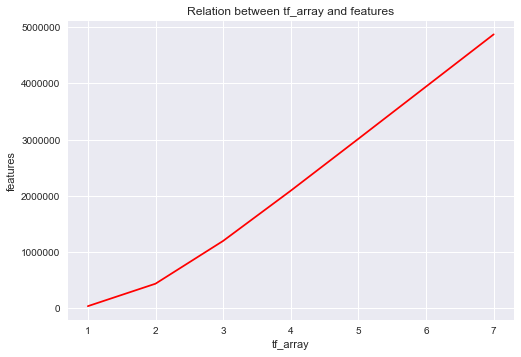

In [11]:
#Explore how the ngram_range change the number of features; test ngrams from (1,1) to (1,7) on 500 docs.
plt.plot([1,2,3,4,5,6,7],tf_array,'r')
plt.xlabel("tf_array")
plt.ylabel("features")
  
plt.title("Relation between tf_array and features")
plt.show()

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [6]:
#Based upon Problem 2 pick some parameters for TfidfVectorizer
tf = TfidfVectorizer()
tf.get_params().keys()

dict_keys(['analyzer', 'binary', 'decode_error', 'dtype', 'encoding', 'input', 'lowercase', 'max_df', 'max_features', 'min_df', 'ngram_range', 'norm', 'preprocessor', 'smooth_idf', 'stop_words', 'strip_accents', 'sublinear_tf', 'token_pattern', 'tokenizer', 'use_idf', 'vocabulary'])

In [7]:
#run cross-validation on different values of min_df based on the result of problem 2
DATA_FOLDER = "txt_sentoken"
if __name__ == "__main__":
    # load data
    dataset = load_files(DATA_FOLDER, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=None)
    
    
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=1, max_df=0.95, ngram_range=(1,1))),
        ('clf', LinearSVC(C=1000)),
    ])
    parameters = {
        'vect__min_df': range(20)
        
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))
        
        # predict docs_test 
    print ('best params', grid_search.best_params_)
    y_predicted = grid_search.predict(docs_test)

    # print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))


n_samples: 2000
0 params - {'vect__min_df': 0}; mean - 0.82; std - 0.02
1 params - {'vect__min_df': 1}; mean - 0.82; std - 0.02
2 params - {'vect__min_df': 2}; mean - 0.82; std - 0.02
3 params - {'vect__min_df': 3}; mean - 0.81; std - 0.02
4 params - {'vect__min_df': 4}; mean - 0.81; std - 0.01
5 params - {'vect__min_df': 5}; mean - 0.81; std - 0.01
6 params - {'vect__min_df': 6}; mean - 0.81; std - 0.01
7 params - {'vect__min_df': 7}; mean - 0.81; std - 0.01
8 params - {'vect__min_df': 8}; mean - 0.81; std - 0.02
9 params - {'vect__min_df': 9}; mean - 0.81; std - 0.01
10 params - {'vect__min_df': 10}; mean - 0.81; std - 0.01
11 params - {'vect__min_df': 11}; mean - 0.81; std - 0.01
12 params - {'vect__min_df': 12}; mean - 0.81; std - 0.01
13 params - {'vect__min_df': 13}; mean - 0.81; std - 0.01
14 params - {'vect__min_df': 14}; mean - 0.81; std - 0.01
15 params - {'vect__min_df': 15}; mean - 0.81; std - 0.01
16 params - {'vect__min_df': 16}; mean - 0.81; std - 0.01
17 params - {'vect

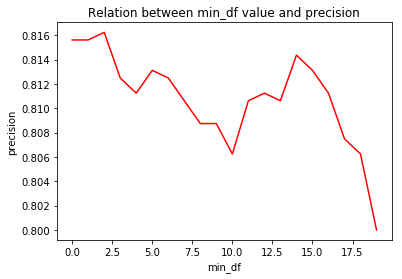

In [8]:
#Explore how the ngram_range change the number of features; test ngrams from (1,1) to (1,7) on 500 docs.
plt.plot(range(20), grid_search.cv_results_['mean_test_score'],'r')
plt.xlabel("min_df")
plt.ylabel("precision")
  
plt.title("Relation between min_df value and precision")
plt.show()

In [9]:
#run cross-validation on different max_df based on the result of problem 2
DATA_FOLDER = "txt_sentoken"
if __name__ == "__main__":
    # load data
    dataset = load_files(DATA_FOLDER, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=None)
    
    
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=1, max_df=0.95, ngram_range=(1,1))),
        ('clf', LinearSVC(C=1000)),
    ])
    parameters = {
        #program crashes when using numpy.linspace
        'vect__max_df': np.arange(0.1,1.0,0.05)
        
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))
        
        # predict docs_test 
    print ('best params', grid_search.best_params_)
    y_predicted = grid_search.predict(docs_test)

    # print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))


n_samples: 2000
0 params - {'vect__max_df': 0.10000000000000001}; mean - 0.79; std - 0.03
1 params - {'vect__max_df': 0.15000000000000002}; mean - 0.80; std - 0.02
2 params - {'vect__max_df': 0.20000000000000004}; mean - 0.81; std - 0.02
3 params - {'vect__max_df': 0.25000000000000006}; mean - 0.81; std - 0.02
4 params - {'vect__max_df': 0.30000000000000004}; mean - 0.81; std - 0.02
5 params - {'vect__max_df': 0.35000000000000009}; mean - 0.81; std - 0.02
6 params - {'vect__max_df': 0.40000000000000013}; mean - 0.82; std - 0.02
7 params - {'vect__max_df': 0.45000000000000007}; mean - 0.82; std - 0.02
8 params - {'vect__max_df': 0.50000000000000011}; mean - 0.82; std - 0.01
9 params - {'vect__max_df': 0.55000000000000016}; mean - 0.82; std - 0.02
10 params - {'vect__max_df': 0.6000000000000002}; mean - 0.83; std - 0.02
11 params - {'vect__max_df': 0.65000000000000013}; mean - 0.83; std - 0.01
12 params - {'vect__max_df': 0.70000000000000018}; mean - 0.83; std - 0.02
13 params - {'vect__

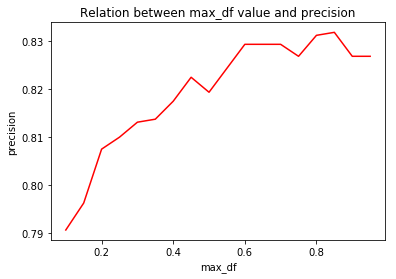

In [10]:
#Explore how the ngram_range change the number of features; test ngrams from (1,1) to (1,7) on 500 docs.
plt.plot(np.arange(0.1,1.0,0.05), grid_search.cv_results_['mean_test_score'],'r')
plt.xlabel("max_df")
plt.ylabel("precision")
  
plt.title("Relation between max_df value and precision")
plt.show()

In [12]:
#run cross-validation on different ngram_range based on the result of problem 2
DATA_FOLDER = "txt_sentoken"
if __name__ == "__main__":
    # load data
    dataset = load_files(DATA_FOLDER, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=None)
    
    
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=1, max_df=0.95, ngram_range=(1,1))),
        ('clf', LinearSVC(C=1000)),
    ])
    parameters = {
        'vect__ngram_range': [(1,1),(2,2),(3,3),(4,4),(1,2),(2,3),(3,4),(1,3),(2,4),(1,4),(1,5)]
        
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))
        
        # predict docs_test 
    print ('best params', grid_search.best_params_)
    y_predicted = grid_search.predict(docs_test)

    # print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))


n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.85; std - 0.01
1 params - {'vect__ngram_range': (2, 2)}; mean - 0.82; std - 0.01
2 params - {'vect__ngram_range': (3, 3)}; mean - 0.79; std - 0.02
3 params - {'vect__ngram_range': (4, 4)}; mean - 0.72; std - 0.01
4 params - {'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.00
5 params - {'vect__ngram_range': (2, 3)}; mean - 0.81; std - 0.01
6 params - {'vect__ngram_range': (3, 4)}; mean - 0.78; std - 0.02
7 params - {'vect__ngram_range': (1, 3)}; mean - 0.84; std - 0.00
8 params - {'vect__ngram_range': (2, 4)}; mean - 0.80; std - 0.00
9 params - {'vect__ngram_range': (1, 4)}; mean - 0.82; std - 0.00
10 params - {'vect__ngram_range': (1, 5)}; mean - 0.82; std - 0.00
best params {'vect__ngram_range': (1, 1)}
             precision    recall  f1-score   support

        neg       0.83      0.79      0.81       205
        pos       0.79      0.83      0.81       195

avg / total       0.81      0.81      0.81       400



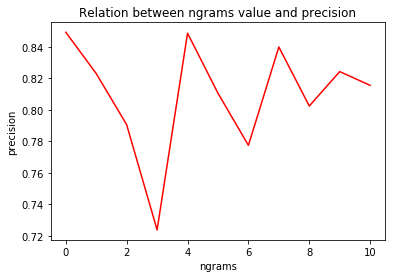

In [13]:
#Explore how the ngram_range change the number of features; test ngrams from (1,1) to (1,7) on 500 docs.
plt.plot(range(11), grid_search.cv_results_['mean_test_score'],'r')
plt.xlabel("ngrams")
plt.ylabel("precision")
  
plt.title("Relation between ngrams value and precision")
plt.show()

In [5]:
#based on previous result, the parameters are chosen as follows
#min_df = 5, max_df = .55, ngram_range(1,2)
vect = TfidfVectorizer(decode_error='ignore',min_df=5, max_df=.55, ngram_range = (1,2))

In [6]:
#Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
X_train = vect.fit_transform(docs_train)

In [7]:
#Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
X_test=vect.transform(docs_test)

In [8]:
#Examine two classifiers provided by scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

DATA_FOLDER = "txt_sentoken"
if __name__ == "__main__":
    # load data
    dataset = load_files(DATA_FOLDER, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=None)
    
    # LinearSVC  ----------------------------------------------------------------------------------------------------------------
    # Build a vectorizer / classifier pipeline that filters out tokens
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,2))),
        ('clf', LinearSVC(C=1000)),
    ])

    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        #'vect__ngram_range': [(1, 1), (1, 2)]
        'clf__C': [0.1, 0.5, 1.0],
        
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # predict docs_test 
    print ('best params', grid_search.best_params_)
    y_predicted = grid_search.predict(docs_test)

    # print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)
    
    
    # KNeighborsClassifier  -------------------------------------------------------------
    
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,2))),
        ('clf', KNeighborsClassifier(n_neighbors=3) ),
    ])

    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'clf__n_neighbors': [3, 5, 10, 20, 30, 40, 50, 80, 100, 150, 200, 250, 300, 350, 400],
        
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # TASK: print the mean and std for each candidate along with the parameter
    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    print ('best params:', grid_search.best_params_)
    y_predicted = grid_search.predict(docs_test)

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)
   

n_samples: 2000
0 params - {'clf__C': 0.1}; mean - 0.82; std - 0.01
1 params - {'clf__C': 0.5}; mean - 0.84; std - 0.01
2 params - {'clf__C': 1.0}; mean - 0.84; std - 0.02
best params {'clf__C': 1.0}
             precision    recall  f1-score   support

        neg       0.86      0.82      0.84       184
        pos       0.85      0.89      0.87       216

avg / total       0.86      0.86      0.86       400

[[151  33]
 [ 24 192]]
0 params - {'clf__n_neighbors': 3}; mean - 0.67; std - 0.00
1 params - {'clf__n_neighbors': 5}; mean - 0.67; std - 0.01
2 params - {'clf__n_neighbors': 10}; mean - 0.69; std - 0.00
3 params - {'clf__n_neighbors': 20}; mean - 0.71; std - 0.02
4 params - {'clf__n_neighbors': 30}; mean - 0.72; std - 0.03
5 params - {'clf__n_neighbors': 40}; mean - 0.72; std - 0.02
6 params - {'clf__n_neighbors': 50}; mean - 0.74; std - 0.02
7 params - {'clf__n_neighbors': 80}; mean - 0.75; std - 0.01
8 params - {'clf__n_neighbors': 100}; mean - 0.76; std - 0.00
9 params - {'c

In [15]:
#run cross-validation on different values of min_df, max_df based on the result of problem 2
DATA_FOLDER = "txt_sentoken"
if __name__ == "__main__":
    # load data
    dataset = load_files(DATA_FOLDER, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=None)
    
    
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=1, max_df=0.95, ngram_range=(1,2))),
        ('clf', LinearSVC(C=1000)),
    ])
    parameters = {
        'vect__min_df': range(10),
        'vect__max_df': np.arange(0.1,1.0,0.01)
        
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=2)
    grid_search.fit(docs_train, y_train)

    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))
        
        # predict docs_test 
    print ('best params', grid_search.best_params_)
    y_predicted = grid_search.predict(docs_test)

    # print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))


n_samples: 2000
0 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 0}; mean - 0.83; std - 0.00
1 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 1}; mean - 0.83; std - 0.00
2 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 2}; mean - 0.84; std - 0.01
3 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 3}; mean - 0.84; std - 0.01
4 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 4}; mean - 0.84; std - 0.01
5 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 5}; mean - 0.84; std - 0.01
6 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 6}; mean - 0.84; std - 0.01
7 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 7}; mean - 0.84; std - 0.01
8 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 8}; mean - 0.83; std - 0.00
9 params - {'vect__max_df': 0.10000000000000001, 'vect__min_df': 9}; mean - 0.83; std - 0.00
10 params - {'vect__max_df': 0.11, 'vect__min_df': 0};

616 params - {'vect__max_df': 0.70999999999999963, 'vect__min_df': 6}; mean - 0.86; std - 0.01
617 params - {'vect__max_df': 0.70999999999999963, 'vect__min_df': 7}; mean - 0.86; std - 0.01
618 params - {'vect__max_df': 0.70999999999999963, 'vect__min_df': 8}; mean - 0.85; std - 0.00
619 params - {'vect__max_df': 0.70999999999999963, 'vect__min_df': 9}; mean - 0.85; std - 0.01
620 params - {'vect__max_df': 0.71999999999999964, 'vect__min_df': 0}; mean - 0.86; std - 0.00
621 params - {'vect__max_df': 0.71999999999999964, 'vect__min_df': 1}; mean - 0.86; std - 0.00
622 params - {'vect__max_df': 0.71999999999999964, 'vect__min_df': 2}; mean - 0.86; std - 0.00
623 params - {'vect__max_df': 0.71999999999999964, 'vect__min_df': 3}; mean - 0.87; std - 0.01
624 params - {'vect__max_df': 0.71999999999999964, 'vect__min_df': 4}; mean - 0.86; std - 0.01
625 params - {'vect__max_df': 0.71999999999999964, 'vect__min_df': 5}; mean - 0.87; std - 0.01
626 params - {'vect__max_df': 0.71999999999999964,

In [33]:
#Examine two classifiers provided by scikit-learn - LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

DATA_FOLDER = "txt_sentoken"
if __name__ == "__main__":
    # load data
    dataset = load_files(DATA_FOLDER, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=None)
    
    # LinearSVC  ----------------------------------------------------------------------------------------------------------------
    # Build a vectorizer / classifier pipeline that filters out tokens
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=5, max_df=.55, ngram_range = (1,2))),
        ('clf', LinearSVC(C=1000)),
    ])

    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__min_df': range(10),
        'vect__max_df': np.arange(0.4,0.9,0.1),
        'vect__ngram_range': [(1, 1), (1, 2)],
        'clf__C': [0.1, 0.5, 1.0],
        
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # predict docs_test 
    print ('best params', grid_search.best_params_)
    y_predicted = grid_search.predict(docs_test)

    # print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)
    


n_samples: 2000
0 params - {'clf__C': 0.1, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 0, 'vect__ngram_range': (1, 1)}; mean - 0.81; std - 0.01
1 params - {'clf__C': 0.1, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 0, 'vect__ngram_range': (1, 2)}; mean - 0.83; std - 0.00
2 params - {'clf__C': 0.1, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}; mean - 0.81; std - 0.01
3 params - {'clf__C': 0.1, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}; mean - 0.83; std - 0.00
4 params - {'clf__C': 0.1, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 2, 'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.01
5 params - {'clf__C': 0.1, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}; mean - 0.83; std - 0.01
6 params - {'clf__C': 0.1, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 3, 'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.00
7 params - {'clf__C': 0.1

In [32]:
#Examine two classifiers provided by scikit-learn - KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

DATA_FOLDER = "txt_sentoken"
if __name__ == "__main__":
    # load data
    dataset = load_files(DATA_FOLDER, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=None)
    
    # KNeighborsClassifier  -------------------------------------------------------------
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=5, max_df=.55, ngram_range = (1,2))),
        ('clf',  KNeighborsClassifier(n_neighbors=3)),
    ])

    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__min_df': range(10),
        'vect__max_df': np.arange(0.4,0.9,0.1),
        'vect__ngram_range': [(1, 1), (1, 2)],
        'clf__n_neighbors': [3, 5, 10, 50, 100, 200, 250, 300],
        
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # TASK: print the mean and std for each candidate along with the parameter
    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    print ('best params:', grid_search.best_params_)
    y_predicted = grid_search.predict(docs_test)

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)
   

n_samples: 2000
0 params - {'clf__n_neighbors': 3, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 0, 'vect__ngram_range': (1, 1)}; mean - 0.65; std - 0.02
1 params - {'clf__n_neighbors': 3, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 0, 'vect__ngram_range': (1, 2)}; mean - 0.66; std - 0.01
2 params - {'clf__n_neighbors': 3, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}; mean - 0.65; std - 0.02
3 params - {'clf__n_neighbors': 3, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}; mean - 0.66; std - 0.01
4 params - {'clf__n_neighbors': 3, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 2, 'vect__ngram_range': (1, 1)}; mean - 0.65; std - 0.02
5 params - {'clf__n_neighbors': 3, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}; mean - 0.67; std - 0.01
6 params - {'clf__n_neighbors': 3, 'vect__max_df': 0.40000000000000002, 'vect__min_df': 3, 'vect__ngram_range': (1

529 params - {'clf__n_neighbors': 200, 'vect__max_df': 0.5, 'vect__min_df': 4, 'vect__ngram_range': (1, 2)}; mean - 0.79; std - 0.01
530 params - {'clf__n_neighbors': 200, 'vect__max_df': 0.5, 'vect__min_df': 5, 'vect__ngram_range': (1, 1)}; mean - 0.78; std - 0.01
531 params - {'clf__n_neighbors': 200, 'vect__max_df': 0.5, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}; mean - 0.79; std - 0.01
532 params - {'clf__n_neighbors': 200, 'vect__max_df': 0.5, 'vect__min_df': 6, 'vect__ngram_range': (1, 1)}; mean - 0.78; std - 0.00
533 params - {'clf__n_neighbors': 200, 'vect__max_df': 0.5, 'vect__min_df': 6, 'vect__ngram_range': (1, 2)}; mean - 0.79; std - 0.02
534 params - {'clf__n_neighbors': 200, 'vect__max_df': 0.5, 'vect__min_df': 7, 'vect__ngram_range': (1, 1)}; mean - 0.77; std - 0.01
535 params - {'clf__n_neighbors': 200, 'vect__max_df': 0.5, 'vect__min_df': 7, 'vect__ngram_range': (1, 2)}; mean - 0.79; std - 0.01
536 params - {'clf__n_neighbors': 200, 'vect__max_df': 0.5, 'vect__mi

In [5]:
#based on previous result, the parameters are chosen as follows
#min_df = 9, max_df = .60, ngram_range(1,2)
vect = TfidfVectorizer(decode_error='ignore',min_df=9, max_df=.60, ngram_range = (1,2))

In [6]:
#Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
X_train = vect.fit_transform(docs_train)

In [7]:
#Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
X_test=vect.transform(docs_test)

In [8]:
#For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
clf = LinearSVC(C=0.5)
clf.fit(X_train,y_train)
y_predicted = clf.predict(X_test)

In [9]:
print(metrics.classification_report(y_test, y_predicted,target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.87      0.86      0.87       251
        pos       0.86      0.87      0.87       249

avg / total       0.87      0.87      0.87       500



In [14]:
wrong_answer = []
for i in range(len(y_predicted)):
    if y_predicted[i] != y_test[i]:
        wrong_answer.append(i)
print("wrong answer", wrong_answer)
print("number of wrong answers: ", len(wrong_answer))


print("predicted anwser: ", y_predicted[0])
print("answer: ", y_test[0])

wrong answer [0, 6, 44, 52, 68, 79, 91, 95, 103, 106, 110, 121, 123, 130, 147, 167, 173, 174, 180, 181, 187, 191, 204, 207, 209, 219, 238, 249, 259, 261, 268, 269, 281, 285, 293, 295, 306, 309, 322, 334, 344, 345, 346, 349, 358, 367, 372, 375, 384, 390, 396, 397, 400, 410, 430, 437, 455, 458, 460, 471, 479, 488, 489, 492, 495, 496, 498]
number of wrong answers:  67
predicted anwser:  1
answer:  0


In [11]:
string = docs_test[0].decode('UTF-8')
print(string.rstrip())

terrence malick made an excellent 90 minute film adaptation of james jones' world war ii novel . 
unfortunately , he buried it within an overlong and overreaching 3-hour long pseudo-epic . 
this is a shame because the film features an outstanding performance by nick nolte . 
the best scene is when nick nolte's character , lt . col . tall , is forced to deal with the direct refusal by capt . staros ( elias koteas ) to execute an order . 
nolte's reaction and transformation may be the best work of his career . 
had terrence malick concentrated on the great performances of nolte and koteas as well as those by sean penn , woody harrelson , and john cusack , he could have made a truly great film . 
instead , malick saddled the film with plodding pacing , unnecessary flashbacks , and a voice-over narration all designed to telegraph the great philosophical underpinnings of the story . 
the narration was especially annoying as much of it sounded like very bad high school poetry . 
with a lot o

In [13]:
print("predicted anwser: ", y_predicted[6])
print("answer: ", y_test[6])

predicted anwser:  0
answer:  1


In [12]:
string = docs_test[6].decode('UTF-8')
print(string.rstrip())


i had been expecting more of this movie than the less than thrilling twister . 
twister was good but had no real plot and no one to simpithize with . 
but twister had amazing effects and i was hoping so would volcano 
volcano starts with tommy lee jones at emo . 
he worrys about a small earthquake enough to leave his daughter at home with a baby sitter . 
there is one small quake then another quake . 
then a geologist points out to tommy that its takes a geologic event to heat millions of gallons of water in 12 hours . 
a few hours later large amount of ash start to fall . 
then . . . . it 
starts . 
the volcanic eruption . . . . 
i liked this movie . . . but 
it was not as great as i hoped . 
i was still good none the less . 
it had excellent special effects . 
the best view . . . the 
helecopters flying over the streets of volcanos . 
also . . . there were interesting side stories that made the plot more interesting . 
so . . . it was good ! !


In [84]:
vect2 = TfidfVectorizer(decode_error='ignore',min_df=3, max_df=.95, ngram_range = (1,2))
X_train2 = vect2.fit_transform(docs_train)
X_test2 = vect2.transform(docs_test)

In [85]:
clf2 = LinearSVC(C=1.0)
clf2.fit(X_train2,y_train)
y_predicted2 = clf2.predict(X_test2)
print(metrics.classification_report(y_test, y_predicted,target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.87      0.87      0.87       209
        pos       0.85      0.85      0.85       191

avg / total       0.86      0.86      0.86       400



*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

## PCA

In [27]:
#Since PCA does not work on sparse matrix, we convert the sparse matrix to NumPy array using toarray() 
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

vectorizer = TfidfVectorizer(decode_error='ignore', min_df=6, max_df=0.75, ngram_range=(1, 2))
vectors = vectorizer.fit_transform(dataset.data)

pca = PCA(n_components=2)
X1 = pca.fit(vectors.toarray()).transform(vectors.toarray())
X1

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.03088866]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


array([[-0.11565382,  0.11774947],
       [-0.06102036, -0.01293243],
       [-0.04066935, -0.01652385],
       ..., 
       [ 0.01974311, -0.08131596],
       [ 0.00488496, -0.0979208 ],
       [-0.01366025, -0.01849763]])

In [13]:
#The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension.
print(pca.explained_variance_ratio_)

[ 0.00408558  0.00374035]


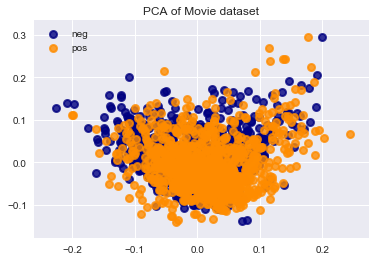

In [14]:
%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X1[y == i, 0], X1[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Movie dataset')

In [6]:
vectorizer = TfidfVectorizer(decode_error='ignore', min_df=6, max_df=0.75, ngram_range=(1, 2))
vectors = vectorizer.fit_transform(dataset.data)

In [7]:
D = vectors.toarray()

In [8]:
D.shape[1]

37500

## SelectKBest

In [9]:
# Using SelectKBest method to choose 600 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

X, y = vectors.toarray(), dataset.target
print(X.shape)

X_new = SelectKBest(f_classif, k=600).fit_transform(X, y)
X_new.shape

(2000, 37500)


(2000, 600)

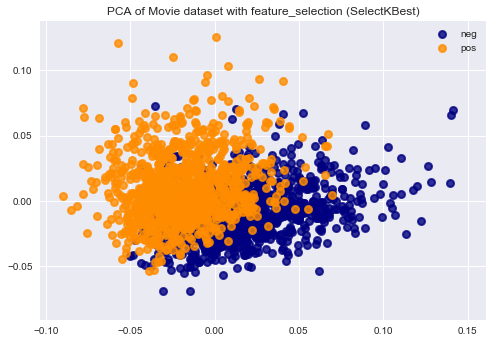

In [13]:
#Using PCA for dimensional reduction with 600 best features selected by SelectKBest method
%matplotlib inline
pca = PCA(n_components=2)
X_r3 = pca.fit(X_new).transform(X_new)

plt.figure()
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r3[y == i, 0], X_r3[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Movie dataset with feature_selection (SelectKBest)')

## Truncated SVC

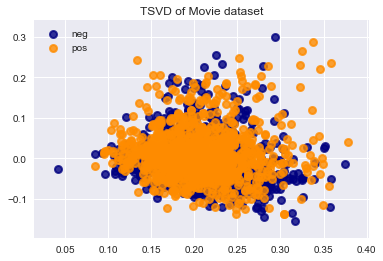

In [39]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD()
D4 = tsvd.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D4[y == i, 0], D4[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSVD of Movie dataset')

## Kernel PCA

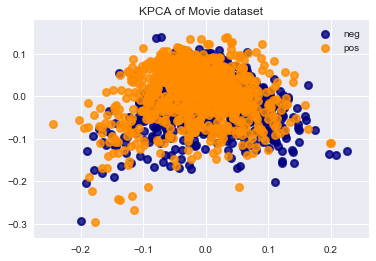

In [48]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA()
D6 = kpca.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D6[y == i, 0], D6[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('KPCA of Movie dataset')

## Kernal PCA - cosine

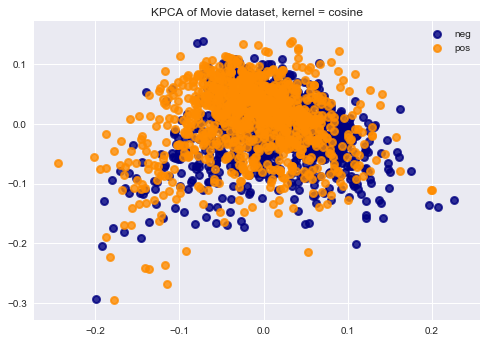

In [15]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='cosine')
D6 = kpca.fit_transform(D)
%matplotlib inline
plt.style.use('seaborn')
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D6[y == i, 0], D6[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('KPCA of Movie dataset, kernel = cosine')

## Kernal PCA - sigmoid

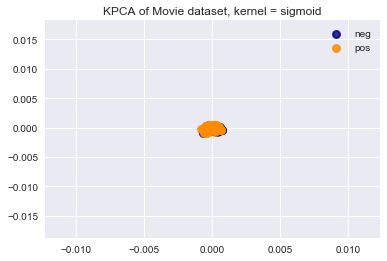

In [16]:
kpca = KernelPCA(kernel='sigmoid')
D_sigmoid = kpca.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D_sigmoid[y == i, 0], D_sigmoid[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('KPCA of Movie dataset, kernel = sigmoid')

## Kernal PCA - poly

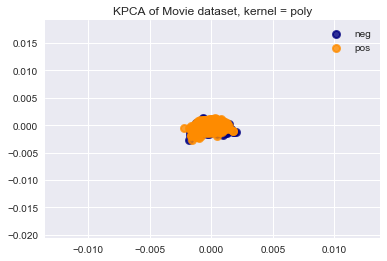

In [17]:
kpca = KernelPCA(kernel='poly')
D_poly=kpca.fit_transform(D)
%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D_poly[y == i, 0], D_poly[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('KPCA of Movie dataset, kernel = poly')

## Incremental PCA

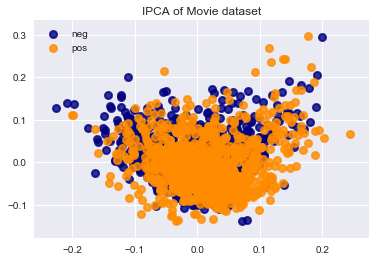

In [43]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA()
D5 = ipca.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D5[y == i, 0], D5[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('IPCA of Movie dataset')

## Making a plot of the number of word "bad" vs length of the review, and the number of "good"

In [18]:
#making a plot of the number of word "bad" vs length of the review, and the number of "good"
l_bad = []
for i in range(2000):
    string = dataset.data[i].decode('UTF_8')   
    number = string.count("bad")    
    l_bad.append(number)

In [19]:
l_len = []
for i in range(2000):
    string = dataset.data[i].decode('UTF_8')
    length = len(string)
    l_len.append(length)

In [20]:
from numpy import array
matrix = []
for i in range(2000):
    matrix.append([l_bad[i], l_len[i]])
a = array(matrix)
print(a)

[[   2 4043]
 [   0 1370]
 [   0 2848]
 ..., 
 [   0 6460]
 [   0 3543]
 [   0 5794]]


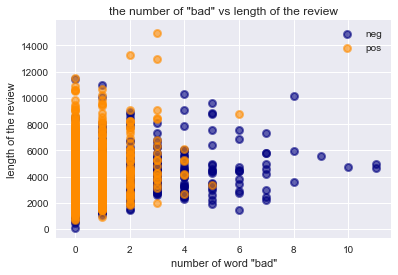

In [21]:
%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(a[y == i, 0], a[y == i, 1], color=color, alpha=.6, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('the number of "bad" vs length of the review')
plt.xlabel('number of word "bad"')
plt.ylabel('length of the review')

In [22]:
#ploting the number of "good"
l_good = []
for i in range(2000):
    string = dataset.data[i].decode('UTF_8')
    number = string.count("good") 
    length = len(string)
    l_good.append(number)
len(l_good)

2000

In [23]:
from numpy import array
matrix = []
for i in range(len(l_good)):
    matrix.append([l_bad[i], l_good[i]])
b = array(matrix)
print(b)

[[2 2]
 [0 1]
 [0 0]
 ..., 
 [0 0]
 [0 1]
 [0 0]]


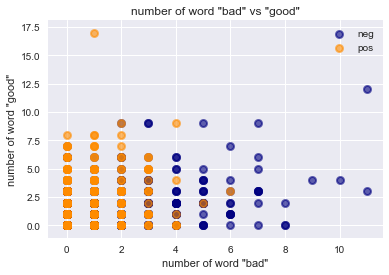

In [24]:
%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(b[y == i, 0], b[y == i, 1], color=color, alpha=.6, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('number of word "bad" vs "good"')
plt.xlabel('number of word "bad"')
plt.ylabel('number of word "good"')

In [29]:
from numpy import array
matrix = []
for i in range(len(l_good)):
    matrix.append([l_good[i], l_len[i]])
c = array(matrix)
print(c)

[[   2 4043]
 [   1 1370]
 [   0 2848]
 ..., 
 [   0 6460]
 [   1 3543]
 [   0 5794]]


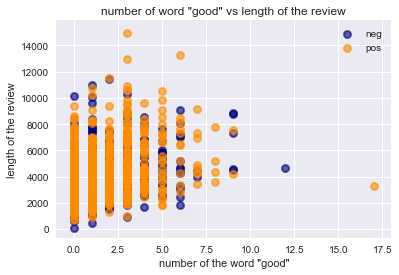

In [30]:
%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(c[y == i, 0], c[y == i, 1], color=color, alpha=.6, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('number of word "good" vs length of the review')
plt.xlabel('number of the word "good"')
plt.ylabel('length of the review')

In [32]:
dataset.data[1]

b'the happy bastard\'s quick movie review \ndamn that y2k bug . \nit\'s got a head start in this movie starring jamie lee curtis and another baldwin brother ( william this time ) in a story regarding a crew of a tugboat that comes across a deserted russian tech ship that has a strangeness to it when they kick the power back on . \nlittle do they know the power within . . . \ngoing for the gore and bringing on a few action sequences here and there , virus still feels very empty , like a movie going for all flash and no substance . \nwe don\'t know why the crew was really out in the middle of nowhere , we don\'t know the origin of what took over the ship ( just that a big pink flashy thing hit the mir ) , and , of course , we don\'t know why donald sutherland is stumbling around drunkenly throughout . \nhere , it\'s just " hey , let\'s chase these people around with some robots " . \nthe acting is below average , even from the likes of curtis . \nyou\'re more likely to get a kick out of 

## Manifold Learning methods

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from mpl_toolkits import mplot3d
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding

## Locally Linear Embedding

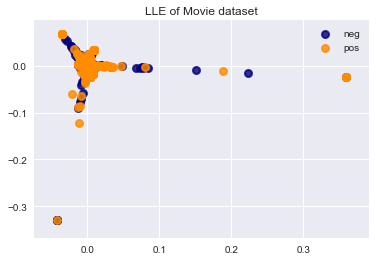

In [14]:
lo = LocallyLinearEmbedding()
new_D = lo.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(new_D[y == i, 0], new_D[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LLE of Movie dataset')

## Spectral Embedding

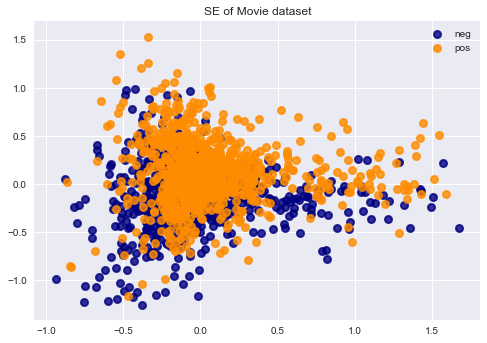

In [19]:
from sklearn.manifold import SpectralEmbedding
spec = SpectralEmbedding()
new_D = spec.fit_transform(D)

%matplotlib inline
plt.style.use('seaborn')
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(new_D[y == i, 0], new_D[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('SE of Movie dataset')

## MDS

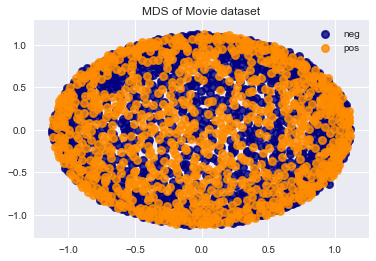

In [23]:
from sklearn.manifold import MDS
mds = MDS()
D1 = mds.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D1[y == i, 0], D1[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('MDS of Movie dataset')

## TSNE

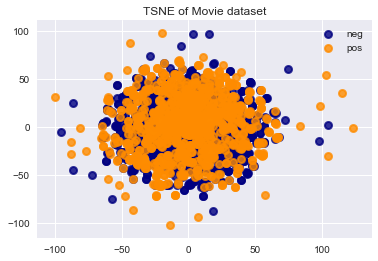

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE()
D2 = tsne.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D2[y == i, 0], D2[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE of Movie dataset')

## IsoMap

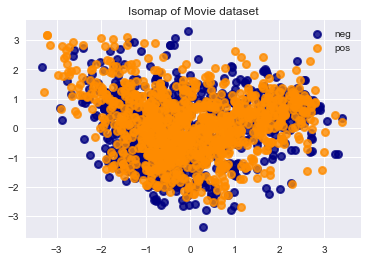

In [33]:
from sklearn.manifold import Isomap
isomap = Isomap()
D3 = isomap.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D3[y == i, 0], D3[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Isomap of Movie dataset')

## GaussianRandomProjection

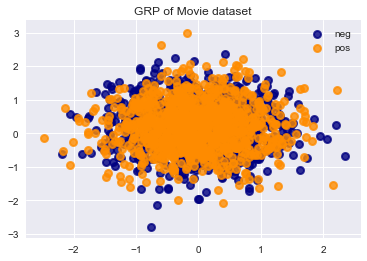

In [55]:
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(2)
D7 = grp.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D7[y == i, 0], D7[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('GRP of Movie dataset')

## SparseRandomProjection

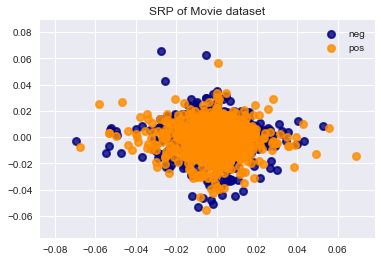

In [23]:
from sklearn.random_projection import SparseRandomProjection
srp = SparseRandomProjection()
D8 = srp.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D8[y == i, 0], D8[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('SRP of Movie dataset')

## FeatureAgglomeration

In [ ]:
# ATTENTION!!
# TAKES FOREVER TO RUN.
# DONT RUN IT AGAIN!!!!!!!!!!!!!!!!!!

from sklearn.cluster import FeatureAgglomeration
agg = FeatureAgglomeration()
D9 = agg.fit_transform(D)

%matplotlib inline
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(D9[y == i, 0], D9[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('FA of Movie dataset')

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **